# XGBoost

Let's learn about a very popular package for gradient boosting called `XGBoost`.

## What we will accomplish

In this notebook we will:
- Introduce the `XGBoost` package and point to the package installation process,
- Discuss what `XGBoost` is and why we use it over `sklearn` and
- Show how to implement gradient boosting regression in `XGBoost`:
    - Demonstrate `XGBoost` early stopping.

In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style

## This sets the plot style
## to have a grid on a white background
set_style("whitegrid")

## Gradient boosting reminder

In the previous notebook we learned what gradient boosting was and demonstrated how to implement it using `sklearn`'s `GradientBoostingRegressor` model object. Recall that this technique is a boosting approach where we iteratively train weak learners by training on the previous learner's residuals. 

## What is `XGBoost`?

While we implemented this algorithm using `sklearn`, another very popular package for gradient boosting is `XGBoost` which stands for eXtreme Gradient Boosting. This particular package is often utilized in winning data science competitions, which likely led to its increase in popularity.

#### Installing `XGBoost`

A quick note! You likely do not have `XGBoost` already installed on your computer (at least I did not prior to writing this notebook). If you have used `pip` to install python packages before you can install `XGBoost` using the command here, <a href="https://xgboost.readthedocs.io/en/latest/install.html#python">https://xgboost.readthedocs.io/en/latest/install.html#python</a>. If you use `conda` to install packages this link should help, <a href="https://anaconda.org/conda-forge/xgboost">https://anaconda.org/conda-forge/xgboost</a>.

<i>Note: When I installed `XGBoost` on my machine it did not work at first, I had to install another piece of softward onto my MacBook before it would work. Follow the documentation from `XGBoost`, it worked for me.</i>

<i>Also Note: If you are running a Mac with an M1 chip the standard installation instructions may not work for you. In that case you should perform a web search to find the relevant instructions.</i>

### Why `XGBoost`?

Why do so many people like using `XGBoost` over `sklearn`'s `GradientBoostingRegressor` and `GradientBoostingClassifier`? In comparison to `sklearn`'s implementation `XGBoost`'s code for fitting gradient boosting models is much faster and tends to perform better than `sklearn`. It even offers the capability for your model to be trained in parallel, which `sklearn` does not currently offer for gradient boosting.

## Implementing gradient boosting regression in `XGBoost`

With this motivation in mind, let's learn how to implement the same regression functionality we did with `sklearn` in the previous notebook. We will provide information on how to run gradient boosting classification and expand on the `XGBoost` syntax in the homework.

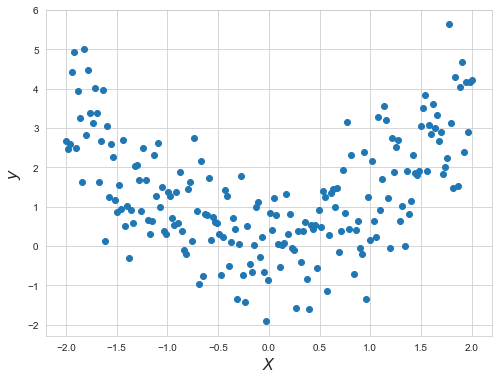

In [2]:
## First make our data set
np.random.seed(220)
X = np.linspace(-2,2,200)

y = X**2 + np.random.randn(200)

## Visualize the training data
plt.figure(figsize=(8,6))
plt.scatter(X,y)
plt.xlabel("$X$", fontsize=16)
plt.ylabel("$y$", fontsize=16)
plt.show()

One way to make a gradient boosting regressor in `XGBoost` is to use `XGBRegressor`, <a href="https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor">https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor</a>.

In [3]:
## import xgboost
import xgboost

In [4]:
## Let's recreate our learning_rate comparison

### Create an XGBRegressor object
### learning_rate=.1, max_depth=1, n_estimators=10
xgb_reg1 = xgboost.XGBRegressor(learning_rate=.1,
                                   max_depth=1,
                                   n_estimators=10)


## fit it
xgb_reg1.fit(X.reshape(-1,1), 
                y)

### Create an XGBRegressor object
### learning_rate=1, max_depth=1, n_estimators=10
xgb_reg2 = xgboost.XGBRegressor(learning_rate=1,
                                   max_depth=1,
                                   n_estimators=10)


## fit it
xgb_reg2.fit(X.reshape(-1,1), 
                y)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=1, max_delta_step=0,
             max_depth=1, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

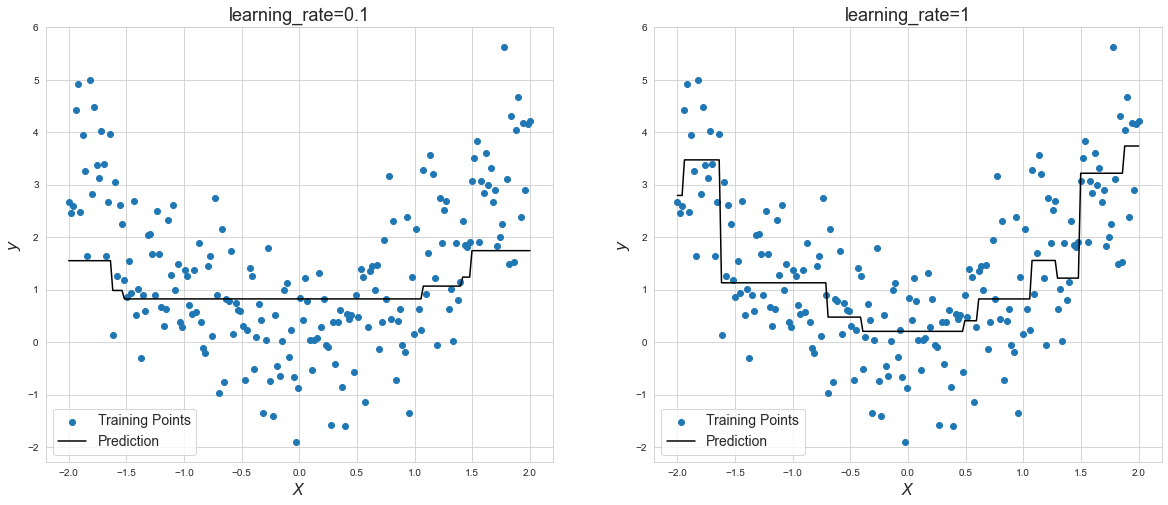

In [5]:
fig,ax = plt.subplots(1,2,figsize=(20,8))

ax[0].scatter(X,y,label='Training Points')
ax[0].plot(X, xgb_reg1.predict(X.reshape(-1,1)), 'k',label="Prediction")
ax[0].set_title("learning_rate=0.1", fontsize=18)
ax[0].legend(fontsize=14)
ax[0].set_xlabel("$X$", fontsize=16)
ax[0].set_ylabel("$y$", fontsize=16)

ax[1].scatter(X,y,label='Training Points')
ax[1].plot(X, xgb_reg2.predict(X.reshape(-1,1)), 'k',label="Prediction")
ax[1].set_title("learning_rate=1", fontsize=18)
ax[1].legend(fontsize=14)
ax[1].set_xlabel("$X$", fontsize=16)
ax[1].set_ylabel("$y$", fontsize=16)

plt.show()

A nice feature of `xgboost`'s model is that it automatically records the performance at each training step on a validation set, provided we give the model the validation set.

In [6]:
## Here I will generate a validation set because the data are randomly generated
## in practice you would need to split the data
X_val = np.linspace(-2,2,200)
y_val = X_val**2 + np.random.randn(200)

In [7]:
## make an XGBRegressor object
## n_estimators = 500, max_depth = 1, learning_rate = .1
xgb_reg = xgboost.XGBRegressor(n_estimators=500,
                          max_depth=1,
                          learning_rate=.1)

## fit the model, including an eval_set
xgb_reg.fit(X.reshape(-1,1), y, eval_set=[(X_val.reshape(-1,1), y_val)])

[0]	validation_0-rmse:1.77179
[1]	validation_0-rmse:1.71867
[2]	validation_0-rmse:1.66455
[3]	validation_0-rmse:1.62196
[4]	validation_0-rmse:1.57879
[5]	validation_0-rmse:1.54459
[6]	validation_0-rmse:1.50800
[7]	validation_0-rmse:1.48094
[8]	validation_0-rmse:1.45219
[9]	validation_0-rmse:1.43014
[10]	validation_0-rmse:1.40503
[11]	validation_0-rmse:1.38715
[12]	validation_0-rmse:1.36746
[13]	validation_0-rmse:1.35279
[14]	validation_0-rmse:1.33496
[15]	validation_0-rmse:1.32275
[16]	validation_0-rmse:1.30585
[17]	validation_0-rmse:1.29586
[18]	validation_0-rmse:1.28377
[19]	validation_0-rmse:1.27520
[20]	validation_0-rmse:1.26043
[21]	validation_0-rmse:1.25324
[22]	validation_0-rmse:1.24013
[23]	validation_0-rmse:1.23483
[24]	validation_0-rmse:1.22628
[25]	validation_0-rmse:1.22111
[26]	validation_0-rmse:1.21005
[27]	validation_0-rmse:1.20554
[28]	validation_0-rmse:1.19881
[29]	validation_0-rmse:1.19473
[30]	validation_0-rmse:1.18531
[31]	validation_0-rmse:1.18161
[32]	validation_0-

[260]	validation_0-rmse:1.05508
[261]	validation_0-rmse:1.05497
[262]	validation_0-rmse:1.05518
[263]	validation_0-rmse:1.05507
[264]	validation_0-rmse:1.05529
[265]	validation_0-rmse:1.05520
[266]	validation_0-rmse:1.05551
[267]	validation_0-rmse:1.05512
[268]	validation_0-rmse:1.05540
[269]	validation_0-rmse:1.05564
[270]	validation_0-rmse:1.05529
[271]	validation_0-rmse:1.05569
[272]	validation_0-rmse:1.05529
[273]	validation_0-rmse:1.05557
[274]	validation_0-rmse:1.05549
[275]	validation_0-rmse:1.05557
[276]	validation_0-rmse:1.05546
[277]	validation_0-rmse:1.05557
[278]	validation_0-rmse:1.05549
[279]	validation_0-rmse:1.05557
[280]	validation_0-rmse:1.05547
[281]	validation_0-rmse:1.05568
[282]	validation_0-rmse:1.05533
[283]	validation_0-rmse:1.05557
[284]	validation_0-rmse:1.05547
[285]	validation_0-rmse:1.05568
[286]	validation_0-rmse:1.05558
[287]	validation_0-rmse:1.05569
[288]	validation_0-rmse:1.05561
[289]	validation_0-rmse:1.05593
[290]	validation_0-rmse:1.05555
[291]	va

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=1, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [8]:
## demonstrate .evals_result()
xgb_reg.evals_result()

{'validation_0': OrderedDict([('rmse',
               [1.771788,
                1.718668,
                1.664546,
                1.621963,
                1.578791,
                1.544593,
                1.507999,
                1.480945,
                1.452195,
                1.43014,
                1.405029,
                1.387147,
                1.367456,
                1.352794,
                1.334959,
                1.322751,
                1.305848,
                1.29586,
                1.283767,
                1.275201,
                1.260429,
                1.253244,
                1.240126,
                1.234826,
                1.226277,
                1.221111,
                1.210045,
                1.205535,
                1.198814,
                1.194731,
                1.185305,
                1.181609,
                1.175006,
                1.171635,
                1.166678,
                1.163896,
                1.158117,
 

In [11]:
## get the 'rmse'
xgb_reg.evals_result()['validation_0']['rmse']

[1.771788,
 1.718668,
 1.664546,
 1.621963,
 1.578791,
 1.544593,
 1.507999,
 1.480945,
 1.452195,
 1.43014,
 1.405029,
 1.387147,
 1.367456,
 1.352794,
 1.334959,
 1.322751,
 1.305848,
 1.29586,
 1.283767,
 1.275201,
 1.260429,
 1.253244,
 1.240126,
 1.234826,
 1.226277,
 1.221111,
 1.210045,
 1.205535,
 1.198814,
 1.194731,
 1.185305,
 1.181609,
 1.175006,
 1.171635,
 1.166678,
 1.163896,
 1.158117,
 1.155395,
 1.151297,
 1.150467,
 1.145171,
 1.14319,
 1.137329,
 1.136697,
 1.132274,
 1.131829,
 1.128791,
 1.127487,
 1.123419,
 1.120572,
 1.120481,
 1.116656,
 1.116667,
 1.113146,
 1.112157,
 1.109858,
 1.109981,
 1.106851,
 1.107043,
 1.10414,
 1.102134,
 1.099044,
 1.099293,
 1.096749,
 1.097052,
 1.095423,
 1.093772,
 1.09148,
 1.091784,
 1.089695,
 1.090036,
 1.087881,
 1.087511,
 1.087908,
 1.085774,
 1.084539,
 1.084944,
 1.083024,
 1.08175,
 1.08218,
 1.08032,
 1.080801,
 1.079186,
 1.078128,
 1.077147,
 1.077603,
 1.075934,
 1.076398,
 1.074819,
 1.075289,
 1.073794,
 1.0737

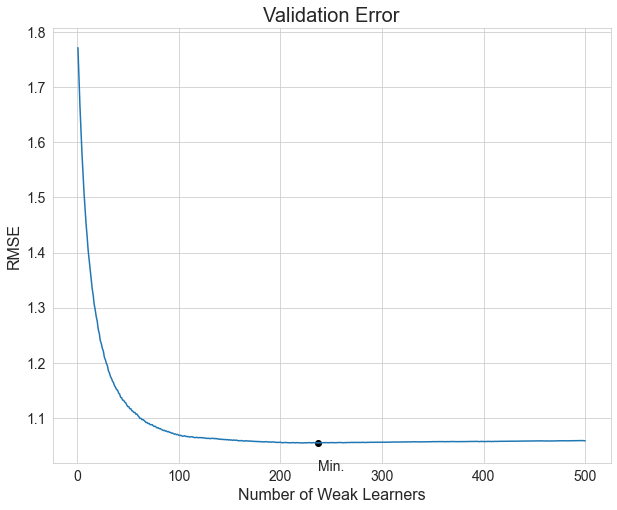

In [12]:
plt.figure(figsize=(10,8))

plt.plot(range(1,len(xgb_reg.evals_result()['validation_0']['rmse'])+1), 
         xgb_reg.evals_result()['validation_0']['rmse'])
plt.scatter([range(1,len(xgb_reg.evals_result()['validation_0']['rmse'])+1)[np.argmin(xgb_reg.evals_result()['validation_0']['rmse'])]], 
            [np.min(xgb_reg.evals_result()['validation_0']['rmse'])], c='k')
plt.text(range(1,len(xgb_reg.evals_result()['validation_0']['rmse'])+1)[np.argmin(xgb_reg.evals_result()['validation_0']['rmse'])], 
         np.min(xgb_reg.evals_result()['validation_0']['rmse'])-.05, "Min.", fontsize=14)

plt.title("Validation Error", fontsize=20)
plt.xlabel("Number of Weak Learners", fontsize=16)
plt.ylabel("RMSE", fontsize=16)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.show()

Further, `XGBoost` allows us to implement early stopping without having to write our own code to do so. We just have to include an `early_stopping_rounds` argument during the `fit` step.

In [13]:
## same xgb_reg as before
xgb_reg = xgboost.XGBRegressor(n_estimators = 500,
                                  max_depth = 1,
                                  learning_rate = .1)


## Now show off early_stopping_rounds with eval_set
xgb_reg.fit(X.reshape(-1,1), y,
                   early_stopping_rounds = 10,
                   eval_set=[(X_val.reshape(-1,1), y_val)])

[0]	validation_0-rmse:1.77179
[1]	validation_0-rmse:1.71867
[2]	validation_0-rmse:1.66455
[3]	validation_0-rmse:1.62196
[4]	validation_0-rmse:1.57879
[5]	validation_0-rmse:1.54459
[6]	validation_0-rmse:1.50800
[7]	validation_0-rmse:1.48094
[8]	validation_0-rmse:1.45219
[9]	validation_0-rmse:1.43014
[10]	validation_0-rmse:1.40503
[11]	validation_0-rmse:1.38715
[12]	validation_0-rmse:1.36746
[13]	validation_0-rmse:1.35279
[14]	validation_0-rmse:1.33496
[15]	validation_0-rmse:1.32275
[16]	validation_0-rmse:1.30585
[17]	validation_0-rmse:1.29586
[18]	validation_0-rmse:1.28377
[19]	validation_0-rmse:1.27520
[20]	validation_0-rmse:1.26043
[21]	validation_0-rmse:1.25324
[22]	validation_0-rmse:1.24013
[23]	validation_0-rmse:1.23483
[24]	validation_0-rmse:1.22628
[25]	validation_0-rmse:1.22111
[26]	validation_0-rmse:1.21005
[27]	validation_0-rmse:1.20554
[28]	validation_0-rmse:1.19881
[29]	validation_0-rmse:1.19473
[30]	validation_0-rmse:1.18531
[31]	validation_0-rmse:1.18161
[32]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=1, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

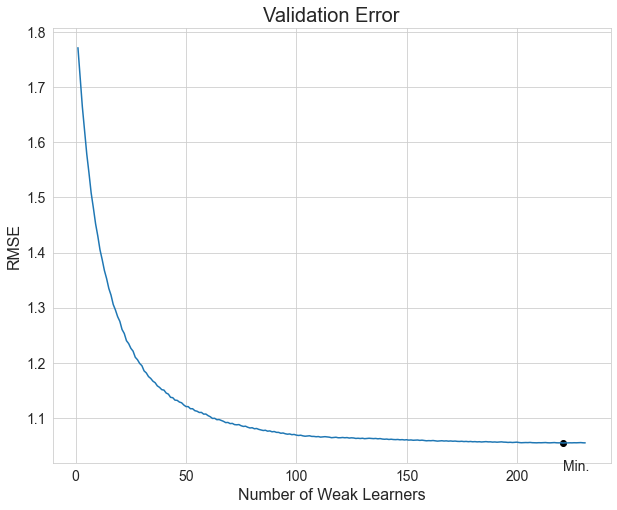

In [14]:
plt.figure(figsize=(10,8))

plt.plot(range(1,len(xgb_reg.evals_result()['validation_0']['rmse'])+1), 
         xgb_reg.evals_result()['validation_0']['rmse'])
plt.scatter([range(1,len(xgb_reg.evals_result()['validation_0']['rmse'])+1)[np.argmin(xgb_reg.evals_result()['validation_0']['rmse'])]], 
            [np.min(xgb_reg.evals_result()['validation_0']['rmse'])], c='k')
plt.text(range(1,len(xgb_reg.evals_result()['validation_0']['rmse'])+1)[np.argmin(xgb_reg.evals_result()['validation_0']['rmse'])], 
         np.min(xgb_reg.evals_result()['validation_0']['rmse'])-.05, "Min.", fontsize=14)

plt.title("Validation Error", fontsize=20)
plt.xlabel("Number of Weak Learners", fontsize=16)
plt.ylabel("RMSE", fontsize=16)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.show()

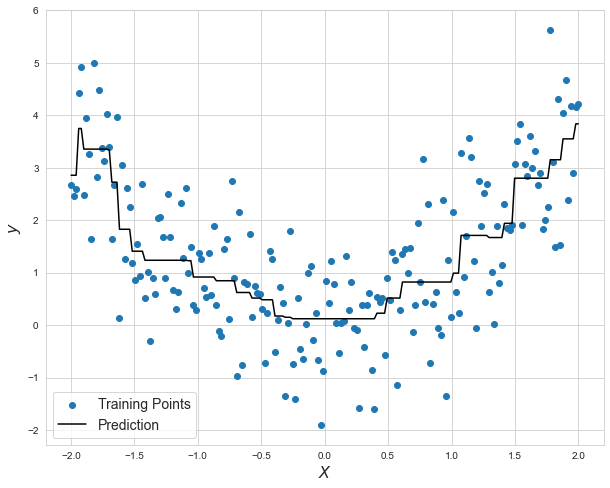

In [15]:
xgb_reg = xgboost.XGBRegressor(n_estimators = 220,
                                  max_depth = 1,
                                  learning_rate = .1)
xgb_reg.fit(X.reshape(-1,1), y)

plt.figure(figsize=(10,8))

plt.scatter(X,y,label='Training Points')
plt.plot(X, xgb_reg.predict(X.reshape(-1,1)), 'k',label="Prediction")
plt.legend(fontsize=14)
plt.xlabel("$X$", fontsize=16)
plt.ylabel("$y$", fontsize=16)

plt.show()

Here we have scratched the surface of what `XGBoost` can do. To learn more about the package check out the gradient boosting `Practice Problems` as well as the `XGBoost` documentation, <a href="https://xgboost.readthedocs.io/en/latest/index.html">https://xgboost.readthedocs.io/en/latest/index.html</a>.

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)